## 고객 세분화를 위한 Instacart EDA

### Data Description

Source : https://www.kaggle.com/c/instacart-market-basket-analysis/data

### 1. 라이브러리 및 데이터 불러오기 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "./data/instacart-market-basket-analysis/"

orders = pd.read_csv(base_path + "orders.csv")
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [ ]:
prior = pd.read_csv(base_path + "order_products__prior.csv")
prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [ ]:
train = pd.read_csv(base_path + "order_products__train.csv")
train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [ ]:
products = pd.read_csv(base_path + "products.csv")
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [ ]:
aisles = pd.read_csv(base_path + "aisles.csv")
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [ ]:
departments = pd.read_csv(base_path + "departments.csv")
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## 2. EDA

- 데이터를 살펴봅니다.

- 데이터에서 필요한 여러가지 통계량을 계산합니다.

- 데이터를 원하는 정보로 재구조화하여 시각화 합니다.

- 실습의 편의성을 위해서 prior 데이터를 3000개로 줄여서 실습합니다. (모든 데이터를 쓰면 Colab이 터집니다ㅠㅠ)

In [ ]:
prior = prior[:3000] # reduced size

### 2-1. Order EDA

- 고객들이 주문 패턴을 살펴봅시다.

- 간단한 통계량을 통해, 어떤 시간에 어떤 제품들을 많이 샀는지 찾아봅니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


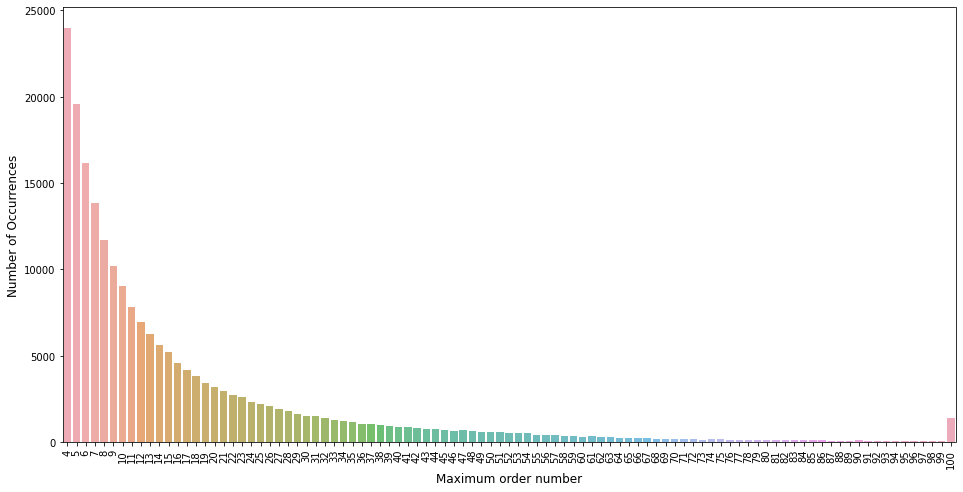

In [ ]:
count_df = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
count_df = count_df.order_number.value_counts()

plt.figure(figsize=(16,8))
sns.barplot(count_df.index, count_df.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

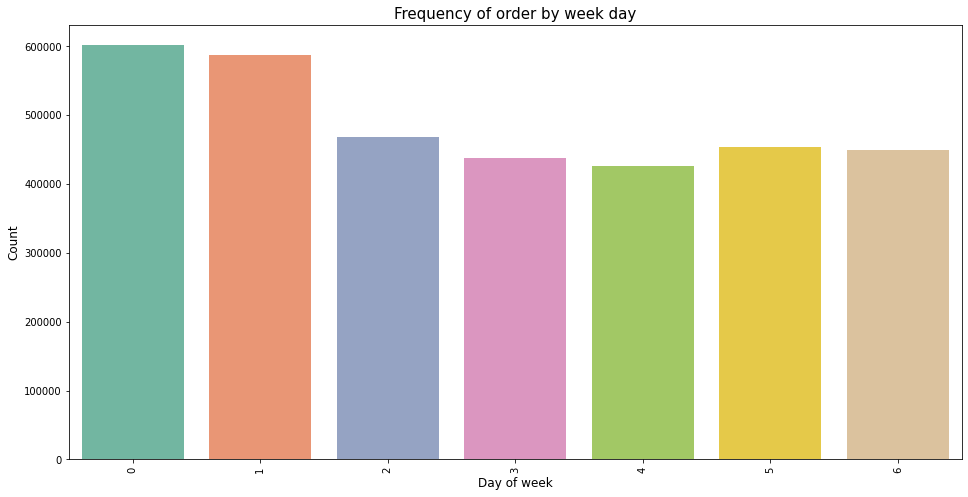

In [ ]:
plt.figure(figsize=(16, 8))
sns.set_palette("Set2")
sns.countplot(x="order_dow", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

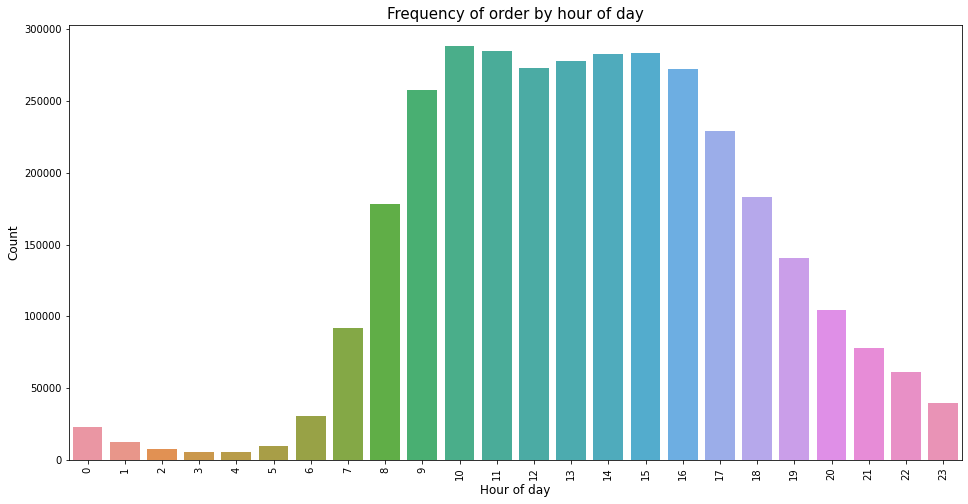

In [ ]:
plt.figure(figsize=(16, 8))
sns.set_palette("Set1")
sns.countplot(x="order_hour_of_day", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

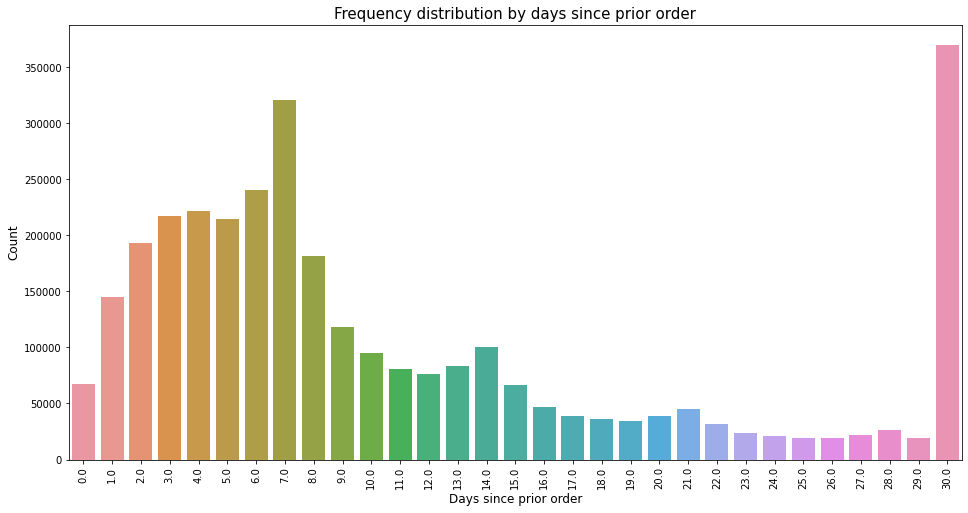

In [ ]:
plt.figure(figsize=(16,8))
sns.set_palette("Set3")
sns.countplot(x="days_since_prior_order", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [ ]:
grouped = prior.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped["reordered"].loc[grouped["reordered"] > 1] = 1
grouped.reordered.value_counts() / grouped.shape[0]

1    0.87987
0    0.12013
Name: reordered, dtype: float64

### 2-2. Product EDA

In [ ]:
temp = pd.merge(prior, products, on="product_id", how="left")
temp = pd.merge(temp, aisles, on="aisle_id", how="left")
order_products = pd.merge(temp, departments, on="department_id", how="left")
order_products

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...
2995,322,4605,7,0,Yellow Onions,83,4,fresh vegetables,produce
2996,322,46526,8,0,French Green Beans,123,4,packaged vegetables fruits,produce
2997,322,37011,9,0,Artichokes,83,4,fresh vegetables,produce
2998,323,47209,1,1,Organic Hass Avocado,24,4,fresh fruits,produce


In [ ]:
count_df = order_products['product_name'].value_counts().reset_index().head(20)
count_df.columns = ['product_name', 'frequency_count']
count_df

,product_name,frequency_count
0,Banana,40
1,Bag of Organic Bananas,36
2,Organic Baby Spinach,25
3,Organic Strawberries,19
4,Strawberries,17
5,Large Lemon,17
6,Organic Hass Avocado,16
7,Organic Avocado,15
8,Honeycrisp Apple,12
9,Organic Raspberries,12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


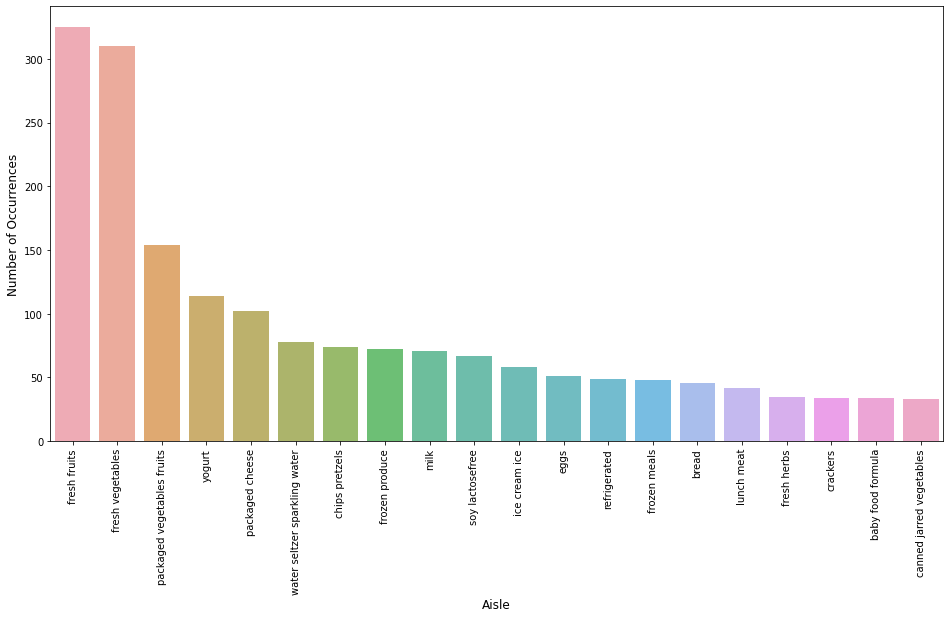

In [ ]:
count_df = order_products['aisle'].value_counts().head(20)
plt.figure(figsize=(16,8))
sns.set_palette("Set2")
sns.barplot(count_df.index, count_df.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

### 3. Data Preprocessing

In [ ]:
# 불러온 모든 테이블을 합칩니다.
temp = pd.merge(prior, orders, on=["order_id", "order_id"])
temp = pd.merge(temp, products, on=["product_id", "product_id"])
temp = pd.merge(temp, aisles, on=["aisle_id" ,"aisle_id"])
data = pd.merge(temp, departments, on=["department_id" ,"department_id"])
data.sort_values(by="user_id")

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
2095,40,33198,3,1,382,prior,29,1,15,23.0,Sparkling Natural Mineral Water,115,7,water seltzer sparkling water,beverages
256,40,10070,1,1,382,prior,29,1,15,23.0,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
258,40,34866,4,1,382,prior,29,1,15,23.0,Chocolate Milk 1% Milkfat,84,16,milk,dairy eggs
2641,40,42450,2,1,382,prior,29,1,15,23.0,Macaroni & Cheese,38,1,frozen meals,frozen
1527,214,25890,8,1,503,prior,5,0,16,9.0,Boneless Skinless Chicken Breasts,49,12,packaged poultry,meat seafood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,3,33754,1,1,205970,prior,16,5,17,12.0,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs
1510,3,17461,7,1,205970,prior,16,5,17,12.0,Air Chilled Organic Boneless Skinless Chicken ...,35,12,poultry counter,meat seafood
1583,3,32665,8,1,205970,prior,16,5,17,12.0,Organic Ezekiel 49 Bread Cinnamon Raisin,112,3,bread,bakery
173,3,17668,5,1,205970,prior,16,5,17,12.0,Unsweetened Chocolate Almond Breeze Almond Milk,91,16,soy lactosefree,dairy eggs


In [ ]:
# 30만개의 거래내역에 대해서 각 물품을 얼마나 샀을까?
data.product_name.value_counts()[:10] # top10

Banana                    40
Bag of Organic Bananas    36
Organic Baby Spinach      25
Organic Strawberries      19
Strawberries              17
Large Lemon               17
Organic Hass Avocado      16
Organic Avocado           15
Cucumber Kirby            12
Organic Raspberries       12
Name: product_name, dtype: int64

In [ ]:
# 고객의 산 물건의 수
# row가 product 단위라서.
data.user_id.value_counts()[:10] # top10

133849    38
139432    36
161214    34
12711     32
156462    31
1059      29
118860    28
169586    27
129389    27
175918    27
Name: user_id, dtype: int64

In [ ]:
# 거래내역에 포함된 소분류별 개수
data.aisle.value_counts()[:10] #top10 # **천 단위로 출력되는지 확인**

fresh fruits                     325
fresh vegetables                 310
packaged vegetables fruits       154
yogurt                           114
packaged cheese                  102
water seltzer sparkling water     78
chips pretzels                    74
frozen produce                    72
milk                              71
soy lactosefree                   67
Name: aisle, dtype: int64

In [ ]:
data.department.value_counts()[:10]

produce         856
dairy eggs      489
frozen          260
beverages       252
snacks          243
pantry          165
canned goods    104
deli            102
bakery           94
household        81
Name: department, dtype: int64